<a href="https://colab.research.google.com/github/harshitajain523/TransCMFD_Copy_Move_Forgery_Detection/blob/main/notebooks/dataset_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import numpy as np
import random
import os
import matplotlib.pyplot as plt


In [2]:
def generate_synthetic_dataset(path="dataset/train", num_images=20, size=128):
    os.makedirs(f"{path}/images", exist_ok=True)
    os.makedirs(f"{path}/masks", exist_ok=True)

    for i in range(num_images):
        # Create a random image
        img = np.random.randint(0, 255, (size, size, 3), dtype=np.uint8)
        mask = np.zeros((size, size), dtype=np.uint8)

        # Copy-paste a patch
        x, y = random.randint(0, 64), random.randint(0, 64)
        w = random.randint(16, 32)
        patch = img[y:y+w, x:x+w].copy()
        dx, dy = random.randint(0, 64), random.randint(0, 64)
        img[dy:dy+w, dx:dx+w] = patch
        mask[dy:dy+w, dx:dx+w] = 255

        # Save image and mask
        Image.fromarray(img).save(f"{path}/images/{i:03}.png")
        Image.fromarray(mask).save(f"{path}/masks/{i:03}.png")

    print(f"Saved {num_images} synthetic images and masks to {path}")

In [3]:
generate_synthetic_dataset("dataset/train", num_images=20)


Saved 20 synthetic images and masks to dataset/train


In [4]:
!ls dataset/train/images | head
!ls dataset/train/masks | head


000.png
001.png
002.png
003.png
004.png
005.png
006.png
007.png
008.png
009.png
000.png
001.png
002.png
003.png
004.png
005.png
006.png
007.png
008.png
009.png


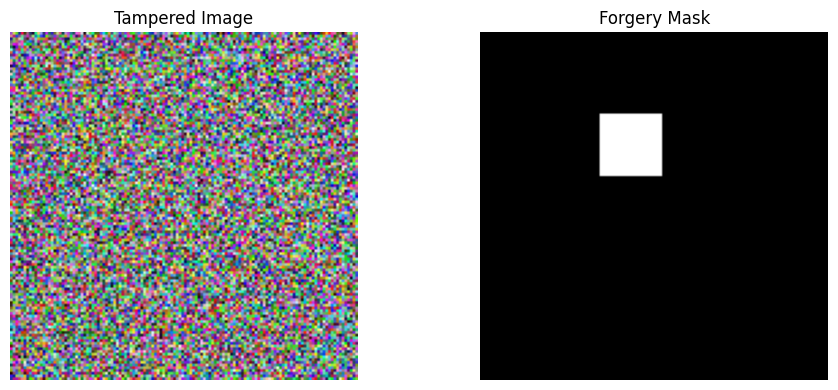

In [5]:
img = Image.open("dataset/train/images/000.png")
mask = Image.open("dataset/train/masks/000.png")

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Tampered Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="gray")
plt.title("Forgery Mask")
plt.axis("off")

plt.tight_layout()
plt.show()


In [7]:
!mkdir -p notebooks
!mv dataset_generator.ipynb notebooks/dataset_generator.ipynb


mv: cannot stat 'dataset_generator.ipynb': No such file or directory
